<a href="https://colab.research.google.com/github/nambahl/hello-world/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 5.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=a2847e902944bcc76691676baf33e7f8d4acbf54e388763800fb0a56a6a6afc1
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=d1630778610c0ad21880a03a4f1977beac00eacba9d39fbbed0670572f70c7b3
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as numpy

In [4]:
tf.__version__

'2.4.1'

In [5]:
fashion_mnist= keras.datasets.fashion_mnist

In [8]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
train_images=train_images/255.0
test_images=test_images/255.0

In [44]:
train_images[0].shape
image= test_images[3]

In [22]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [24]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [25]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [26]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [27]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 50s]
val_accuracy: 0.8798333406448364

Best val_accuracy So Far: 0.9096666574478149
Total elapsed time: 00h 04m 01s
INFO:tensorflow:Oracle triggered exit


In [28]:
tuner_search.results_summary()

Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 48
learning_rate: 0.001
Score: 0.9096666574478149
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 96
learning_rate: 0.001
Score: 0.9089999794960022
Trial summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 128
learning_rate: 0.01
Score: 0.8798333406448364
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 96
learning_rate: 0.01
Score: 0.8636666536331177
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 3
dense_1_units: 96
learning_rate: 0.01
Score: 0.10266666859388351


In [29]:
model=tuner_search.get_best_models(num_models=1)[0]

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 48)        1248      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        76864     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 48)                1228848   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490       
Total params: 1,307,450
Trainable params: 1,307,450
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1831 - accuracy: 0.9324 - val_loss: 0.2481 - val_accuracy: 0.9113
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1443 - accuracy: 0.9472 - val_loss: 0.2698 - val_accuracy: 0.9147
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1121 - accuracy: 0.9582 - val_loss: 0.2924 - val_accuracy: 0.9120
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0852 - accuracy: 0.9686 - val_loss: 0.3187 - val_accuracy: 0.9112
Epoch 8/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0716 - accuracy: 0.9732 - val_loss: 0.4165 - val_accuracy: 0.9075
Epoch 9/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0558 - accuracy: 0.9799 - val_loss: 0.3683 - val_accuracy: 0.9092
Epoch 10/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0455 - accuracy: 0.9835 - val_loss: 0.4209 - val_a

In [34]:
train_images.shape

(60000, 28, 28, 1)

In [35]:
test_loss,test_accuracy= model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4578 - accuracy: 0.9049


In [36]:
predict= model.predict(test_images)

In [70]:
predict[122]

array([9.1018158e-11, 2.5853965e-12, 2.5404610e-14, 4.1052090e-06,
       4.5770796e-12, 4.9344864e-05, 1.8594583e-12, 8.9198029e-06,
       3.6936734e-09, 9.9993765e-01], dtype=float32)

In [71]:
import matplotlib.pyplot as plt
image=test_images[112]
image=image.reshape(28,28)

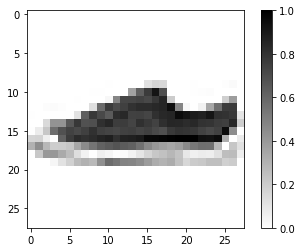

In [72]:
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show() 